<a href="https://colab.research.google.com/github/AmyMorrison2/Capstone/blob/main/Copy_of_CAPSTONE_DELIVERABLE_MORRISON_TDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Milestone--Data Acquisition

import yfinance as yf
import numpy as np
!pip install ripser
from ripser import Rips
import persim
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# define index names: ^GSPC = S&P 500, ^DJI = DOW Jones, ^IXIC=NASDAQ 100, ^RUT = Russell 2000
index_names = ['^GSPC', '^DJI', '^IXIC', '^RUT']

# define date range (2018-2023 to examine trends across 6 year-period which contains the time frame of the crash)
start_date_string = "2018-01-01"
end_date_string = "2023-12-31"

# pull data from Yahoo Finance
raw_data = yf.download(index_names, start=start_date_string, end=end_date_string)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 761.3/761.3 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for hopcroftkarp: filename=hopcroftkarp-1.2.5-py2.py3-none-any.whl size=18101 sha256=ac030097048aa343fe5fa07e6a7dd8106aa75d2702cc97b8f29275c27522a8a0
  Stored in directory: /root/.cache/pip/wheels/ef/0f/3b/0f931844eecc34addd90e72d54cd39c08b7066c5f25c00b9a4
Successfully built hopcroftkarp


[*********************100%%**********************]  4 of 4 completed


In [ ]:
# keep only adjusted closing prices
df_close = raw_data['Adj Close'].dropna(axis='rows')

# examine new dataset
df_close

Ticker,^DJI,^GSPC,^IXIC,^RUT
Date,,,,
2018-01-02,24824.009766,2695.810059,7006.899902,1550.010010
2018-01-03,24922.679688,2713.060059,7065.529785,1552.579956
2018-01-04,25075.130859,2723.989990,7077.910156,1555.719971
2018-01-05,25295.869141,2743.149902,7136.560059,1560.010010
2018-01-08,25283.000000,2747.709961,7157.390137,1561.810059
...,...,...,...,...
2023-12-22,37385.968750,4754.629883,14992.969727,2033.959961
2023-12-26,37545.328125,4774.750000,15074.570312,2059.189941
2023-12-27,37656.519531,4781.580078,15099.179688,2066.209961


In [ ]:
# Milestone--Data Preprocessing

# convert Pandas dataframe to Numpy array of adjusted closing prices (to make numerical calculations easier)
P = df_close.to_numpy()

# display Numpy array
P

array([[24824.00976562,  2695.81005859,  7006.89990234,  1550.01000977],
       [24922.6796875 ,  2713.06005859,  7065.52978516,  1552.57995605],
       [25075.13085938,  2723.98999023,  7077.91015625,  1555.7199707 ],
       ...,
       [37656.51953125,  4781.58007812, 15099.1796875 ,  2066.20996094],
       [37710.1015625 ,  4783.35009766, 15095.13964844,  2058.34008789],
       [37689.5390625 ,  4769.83007812, 15011.34960938,  2027.06994629]])

In [ ]:
# calculate log-returns defined as the log of the ratio between closing values of two subsequent days (normalizes returns and can assist with statistical analysis)
r = np.log(np.divide(P[1:],P[:len(P)-1]))

# display Numpy array of log returns
r

array([[ 0.0039669 ,  0.00637843,  0.00833264,  0.00165665],
       [ 0.00609833,  0.00402054,  0.00175069,  0.00202041],
       [ 0.00876455,  0.00700915,  0.00825219,  0.0027538 ],
       ...,
       [ 0.00295715,  0.00142944,  0.00163118,  0.00340332],
       [ 0.0014219 ,  0.00037011, -0.0002676 , -0.00381612],
       [-0.00054543, -0.00283048, -0.00556626, -0.0153085 ]])

In [ ]:
# convert to csv file
import pandas as pd
df_CSV = pd.DataFrame(r)
df_CSV.to_csv('Stock_Market_Log_Returns', index=False)

In [ ]:
# put log returns into dataframe to calculate summary statistics
import pandas as pd
r_df = pd.DataFrame(r)

# display dataframe
r_df

,0,1,2,3
0,0.003967,0.006378,0.008333,0.001657
1,0.006098,0.004021,0.001751,0.002020
2,0.008765,0.007009,0.008252,0.002754
3,-0.000509,0.001661,0.002915,0.001153
4,0.004058,0.001302,0.000864,-0.001096
...,...,...,...,...
1503,-0.000492,0.001659,0.001943,0.008344
1504,0.004253,0.004223,0.005428,0.012328
1505,0.002957,0.001429,0.001631,0.003403
1506,0.001422,0.000370,-0.000268,-0.003816


In [ ]:
# display summary statistics of log returns
r_df.describe()

,0,1,2,3
count,1508.000000,1508.000000,1508.000000,1508.000000
mean,0.000277,0.000378,0.000505,0.000178
std,0.012937,0.013075,0.015485,0.016509
min,-0.138418,-0.127652,-0.131492,-0.153991
25%,-0.004685,-0.005018,-0.006331,-0.007844
50%,0.000736,0.000844,0.001178,0.000757
75%,0.006114,0.006913,0.008666,0.008924
max,0.107643,0.089683,0.089347,0.089763


In [ ]:
# confirm df_close index is Datetime for proper formatting
print(df_close.index)

DatetimeIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
               '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11',
               '2018-01-12', '2018-01-16',
               ...
               '2023-12-15', '2023-12-18', '2023-12-19', '2023-12-20',
               '2023-12-21', '2023-12-22', '2023-12-26', '2023-12-27',
               '2023-12-28', '2023-12-29'],
              dtype='datetime64[ns]', name='Date', length=1509, freq=None)


In [ ]:
# add date index from adjusted close dataframe to log returns dataframe omitting first row
r_df.index = df_close.index[1:]
#add column names back
r_df.columns = ['DJI', 'GSPC', 'IXIC', 'RUT']
r_df

,DJI,GSPC,IXIC,RUT
Date,,,,
2018-01-03,0.003967,0.006378,0.008333,0.001657
2018-01-04,0.006098,0.004021,0.001751,0.002020
2018-01-05,0.008765,0.007009,0.008252,0.002754
2018-01-08,-0.000509,0.001661,0.002915,0.001153
2018-01-09,0.004058,0.001302,0.000864,-0.001096
...,...,...,...,...
2023-12-22,-0.000492,0.001659,0.001943,0.008344
2023-12-26,0.004253,0.004223,0.005428,0.012328
2023-12-27,0.002957,0.001429,0.001631,0.003403


Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


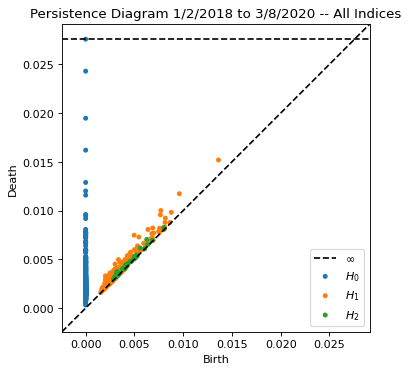

In [ ]:
# create persistence diagram from all indices up to day before crash
# instantiate Vietoris-Rips solver
# examine topological features of data up to 2-dimensional shapes (like holes or voids) which are represented by 2-simplices
plt.rcParams['text.usetex'] = False
rips = Rips(maxdim = 2)

dgm = rips.fit_transform(r_df[:'2020-03-08'])

plt.figure(figsize=(5, 5), dpi=80)
plt.rcParams.update({'font.size': 10})
persim.plot_diagrams(dgm, title="Persistence Diagram 1/2/2018 to 3/8/2020 -- All Indices")

plt.savefig("Persistence_Diagram_up_to_March_8_2020.png", dpi='figure', format=None, metadata=None,
        bbox_inches=None, pad_inches=0.1,
        facecolor='white', edgecolor='auto')

**Comments on Persistence Diagram**

H0 = connected components in the data (groups that indicate similarity in the data)

H1 = Identifies loops or cycles

H2 = Captures holes in the data that indicate complexity

Points further from the diagonal line indicate persistence of topological features.

For H0, the connected components are born at a similar parameter level but exhibit a range of persistence times. The points form a vertical line moving away from the diagonal line. Some market states could be more fleeting, while others are more enduring. Some components merge quickly (near the diagonal line), while some are more persistent (further from the diagonal line). Features that are fleeting could be indicative of an unstable market, while persistent features could indicate a more stable market.

Persistence of features in H1 suggest notable loops in the dataset's topology. There are several points away from the diagonal line which could indicate cyclic or repetitive patterns in the log returns. However, points that are fleeting (near the diagonal) may represent unstable patterns (i.e., short-lived cyclic patterns). These unstable patterns could have significant or insignificant implications for the market.

There are few points in H2 that are far from the diagonal line. This suggests that there are not many persistent higher-dimensional holes or voids in the data. Thus, higher-dimensional topological structures do not play a significant role in the data up to the cutoff point.

Persistence will be examined in the context of Wasserstein distances for further insights.

Text(0.5, 1.0, 'Stock Market Performance vs. Wasserstein Distances')

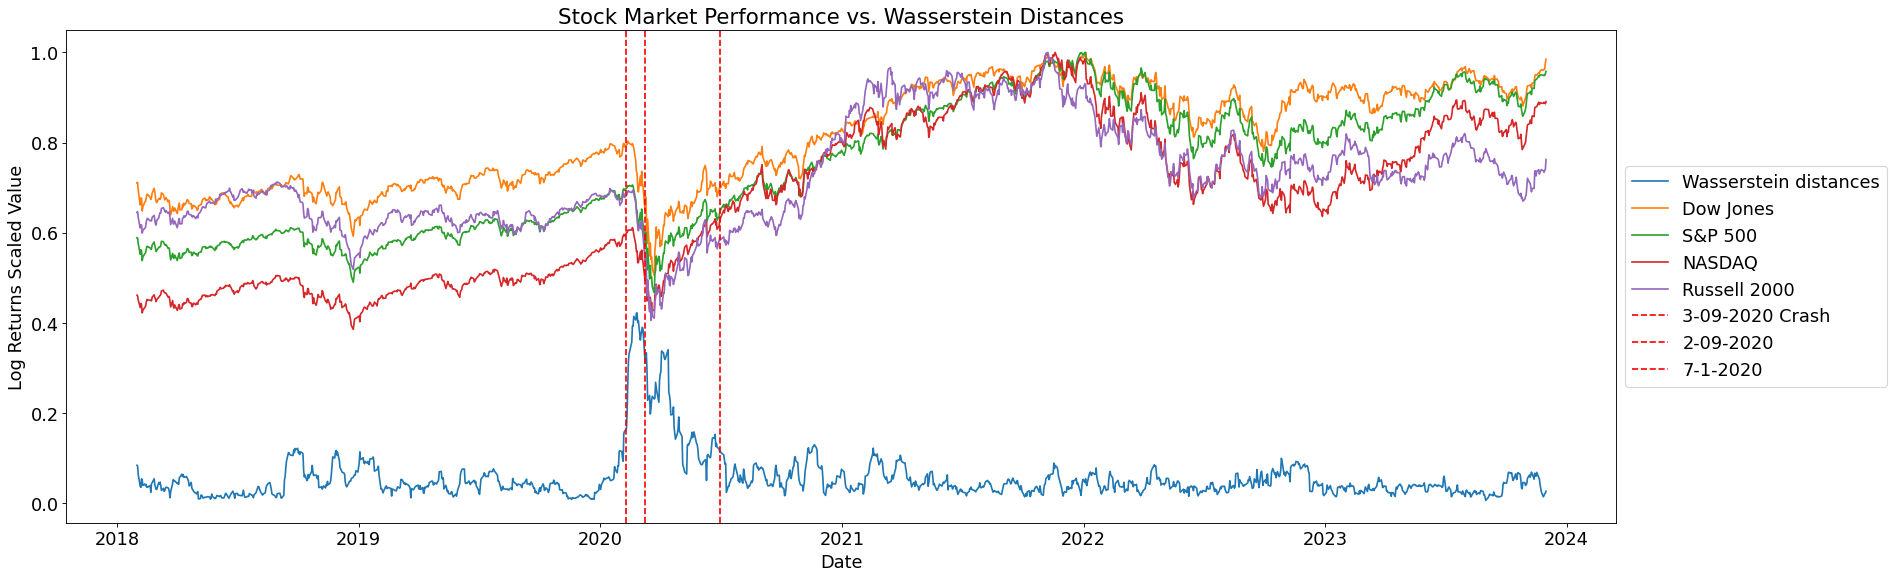

In [ ]:
# Milestone--TDA

# calculate wasserstein distance between two persistence diagrams considering all 4 indices
# distance is one day between log return calculation (log of the ratio between closing values of two subsequent days)
# measure of similarity/dissimilarity between the topological features in the time window
# low Wasserstein distance indicates more similarity between the diagrams

w = 20 # time window size
n = len(raw_data)-(2*w)+1 # number of time segments
wasserstein_dists = np.zeros((n,1)) # initialize array for wasserstein distances

# compute wasserstein distances between persistence diagrams for subsequent time windows
for i in range(n):

    # compute persistence diagrams for adjacent time windows
    dgm1 = rips.fit_transform(r[i:i+w])
    dgm2 = rips.fit_transform(r[i+w+1:i+(2*w)+1])

    # compute wasserstein distance between diagrams
    wasserstein_dists[i] = persim.wasserstein(dgm1[0], dgm2[0], matching=False)

# plot wasserstein distances over time
plt.figure(figsize=(25, 8), dpi=80)
plt.rcParams.update({'font.size': 16})

# plot the Wasserstein distances
plt.plot(raw_data.index[w:n+w], wasserstein_dists, label='Wasserstein distances')

index_labels = ['Dow Jones', 'S&P 500', 'NASDAQ', 'Russell 2000']

for i in range(df_close.shape[1]):
    plt.plot(raw_data.index[w:n+w], df_close.iloc[w:n+w, i] / max(df_close.iloc[w:n+w, i]), label=index_labels[i])

# highlight crash date
specific_date = '2020-03-09'
plt.axvline(x=pd.to_datetime(specific_date), color='r', linestyle='--', label='3-09-2020 Crash')

# highlight beginning of spike
specific_date = '2020-02-09'
plt.axvline(x=pd.to_datetime(specific_date), color='r', linestyle='--', label='2-09-2020')

# highlight end of abnormal wassestein distances
specific_date = '2020-07-01'
plt.axvline(x=pd.to_datetime(specific_date), color='r', linestyle='--', label='7-1-2020')

plt.legend(loc = 'center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Date')
plt.ylabel('Log Returns Scaled Value')
plt.title('Stock Market Performance vs. Wasserstein Distances')

**Comments on Wasserstein Distances**

On February 9, 2020 (one month before the crash), Wasserstein distances began to rapidly increase in a pattern unlike any seen in the years before or after the crash. As of February 9th, there was no market downturn and no declaration of COVID-19 as a pandemic. In fact, the market was reaching all-time highs at this point in time. The Wasserstein distances dramatically spiked approximately two weeks before the crash. Wasserstein distances remained abnormally elevated through June 2020 (which is when the market reportedly recovered). What is significant about these findings is that the spike in the Wasserstein distances could be interpreted as an early warning signal, one that was not identified by traditional market analysis. The topology of the market data, as revealed by the persistence diagrams, changed significantly in the month before the crash. However, stock market returns were seemingly stable and consistent with the previous years. The decrease in log returns during the period of the largest Wasserstein spike before the crash was not even as dramatic as the decline at the end of 2019. Starting on February 9th, there may have been a build-up of unusual market stress that was only evident in the shape of the data. In the future, significant downturns in stock market performance could perhaps be predicted by continuous monitoring of Wasserstein distances. This could result in preemptive approaches to manage risk and prevent extreme financial losses.

In [ ]:
# Milestone--EDA

# use mapper algorithm to visualize clusters of similar data points

!pip install kmapper
import kmapper as km
from kmapper.jupyter import display
!pip install umap
import umap
import sklearn
import sklearn.manifold as manifold

# read text file with ticker names
filename = open("SP500_tickernames_Dec_2023.txt", "r")
raw_tickernames = filename.read()
ticker_names = raw_tickernames.split("\n")
ticker_names = ticker_names[:len(ticker_names)-1]

# define data range
start_date_string = "2018-01-01"
end_date_string = "2020-03-08"

# pull historical data
raw_data = yf.download(ticker_names, start=start_date_string, end = end_date_string)

# get daily close prices and drop missing columns
df_close = raw_data['Adj Close'].dropna(axis = 'columns')

# convert pandas dataframe to numpy array, standardize ticker data, and tranpose array
data = df_close.to_numpy()
data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
data = data.transpose()

# calculate percent return of each ticker over data range
per_return = (df_close.to_numpy().transpose()[:,251] - df_close.to_numpy().transpose()[:,0])/df_close.to_numpy().transpose()[:,0]

#initialize mapper
mapper = km.KeplerMapper(verbose = 1)

# project data into 2D subspace via 2 step transformation, 1)isomap 2)UMAP
!pip install umap-learn
from umap.umap_ import UMAP
from sklearn.manifold import Isomap
projected_data = mapper.fit_transform(data, projection = [Isomap(n_components = 100, n_jobs = -1), UMAP(n_components = 2, random_state = 1)])

# cluster data using DBSCAN
G = mapper.map(projected_data, data, clusterer = sklearn.cluster.DBSCAN(metric = "cosine"))

# define file name
fileID = 'projection=' + G['meta_data']['projection'].split('(')[0] + '_' + \
'n_cubes =' + str(G['meta_data']['n_cubes']) + '_' + \
'clusterer=' + G['meta_data']['clusterer'].split('(')[0] + '_' + \
'scaler=' + G['meta_data']['scaler'].split('(')[0]

# visualize graph
mapper.visualize(G,
                 path_html="mapper_example_" + fileID + ".html",
                 title = fileID,
                 custom_tooltips = df_close.columns.to_numpy(),
                 color_values = np.log(per_return + 1),
                 color_function_name = 'Log Percent Returns',
                 node_color_function = np.array(['average', 'std', 'sum', 'max', 'min']))

from google.colab import files

file_path = "mapper_example_" + fileID + ".html"

files.download(file_path)

[*********************100%%**********************]  503 of 503 completed
ERROR:yfinance:
8 Failed downloads:
ERROR:yfinance:['GEHC', 'ABNB', 'KVUE', 'OTIS', 'VLTO', 'CARR', 'CEG']: Exception("%ticker%: Data doesn't exist for startDate = 1514782800, endDate = 1583643600")
ERROR:yfinance:['CDAY']: Exception('%ticker%: No timezone found, symbol may be delisted')


KeplerMapper(verbose=1)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 5.0 MB/s eta 0:00:00


..Composing projection pipeline of length 2:
	Projections: Isomap(n_components=100, n_jobs=-1)
		UMAP(random_state=1)
	Distance matrices: False
False
	Scalers: MinMaxScaler()
MinMaxScaler()
..Projecting on data shaped (489, 548)

..Projecting data using: 
	Isomap(n_components=100, n_jobs=-1)


..Scaling with: MinMaxScaler()

..Projecting on data shaped (489, 100)

..Projecting data using: 
	UMAP(random_state=1, verbose=1)

UMAP(n_jobs=1, random_state=1, verbose=1)
Fri May  3 02:32:36 2024 Construct fuzzy simplicial set
Fri May  3 02:32:37 2024 Finding Nearest Neighbors
Fri May  3 02:32:41 2024 Finished Nearest Neighbor Search
Fri May  3 02:32:44 2024 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Fri May  3 02:32:47 2024 Finished embedding

..Scaling with: MinMaxScaler()

Mapping on data shaped (489, 548) using lens shaped (489, 2)

Creating 100 hypercubes.

Created 34 edges and 52 nodes in 0:00:00.103886.
Wrote visualization to: mapper_example_projection=UMAP_n_cubes =10_clusterer=DBSCAN_scaler=MinMaxScaler.html


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Comments on Mapper Algorithm**

Exploring the mapper algorithm revealed connections and clusters among stocks. In the HTML file, the clusters can be examined by selecting HELP, e (tight layout), and p (print mode). Click on a node (cluster of stocks), then plus sign for Cluster Details. Various measures can be explored under Node Color Function such as average, high, and low. To explore the meaning these clusters further within the first half of 2020 when the crash and recovery occurred, the top 20 best and worst performing stock from 1/1/2020 to 6/30/2020 were graphed below. These findings are to supplement previous topological data analysis results.

ERROR:yfinance:ABNB: Data doesn't exist for startDate = 1577854800, endDate = 1593489600
ERROR:yfinance:CDAY: No timezone found, symbol may be delisted
ERROR:yfinance:CEG: Data doesn't exist for startDate = 1577854800, endDate = 1593489600
ERROR:yfinance:GEHC: Data doesn't exist for startDate = 1577854800, endDate = 1593489600
ERROR:yfinance:KVUE: Data doesn't exist for startDate = 1577854800, endDate = 1593489600
ERROR:yfinance:VLTO: Data doesn't exist for startDate = 1577854800, endDate = 1593489600


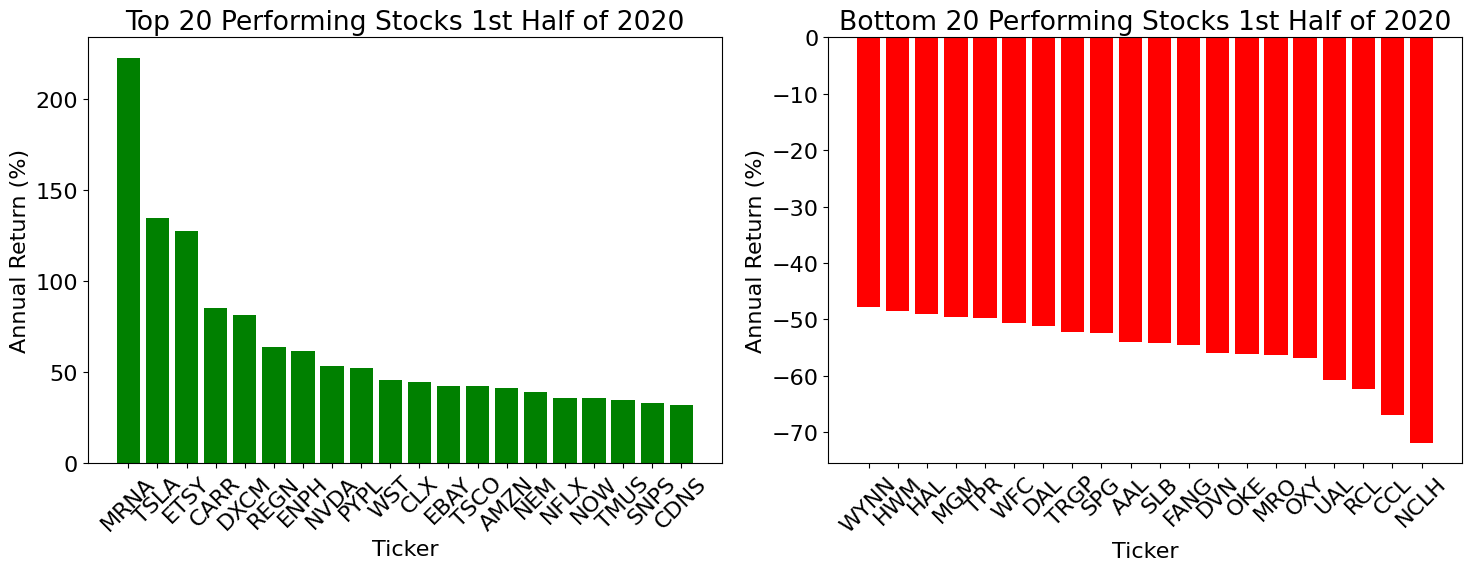

In [ ]:
# Milestone--TDA

# graph of best and worst performing stocks from 1/1/2020 to 6/30/2020

with open("SP500_tickernames_Dec_2023.txt") as file:
    sp500_tickers = [line.strip() for line in file if line.strip()]

# dictionary to hold annual returns
annual_returns = {}

start_date_string = "2020-01-01"
end_date_string = "2020-06-30"

for ticker in sp500_tickers:
    stock = yf.Ticker(ticker)
    hist_data = stock.history(start=start_date_string, end=end_date_string)

    if not hist_data.empty:
        # calculate annual return
        start_price = hist_data['Close'].iloc[0]
        end_price = hist_data['Close'].iloc[-1]
        annual_return = (end_price - start_price) / start_price * 100
        annual_returns[ticker] = annual_return

annual_returns_df = pd.DataFrame(list(annual_returns.items()), columns=['Ticker', 'Annual Return (%)'])
annual_returns_df = annual_returns_df.sort_values(by='Annual Return (%)', ascending=False)
top_20 = annual_returns_df.head(20)
bottom_20 = annual_returns_df.tail(20)

plt.figure(figsize=(15, 6))

# top 20 stocks
plt.subplot(1, 2, 1)
plt.bar(top_20['Ticker'], top_20['Annual Return (%)'], color='green')
plt.title('Top 20 Performing Stocks 1st Half of 2020')
plt.xlabel('Ticker')
plt.ylabel('Annual Return (%)')
plt.xticks(rotation=45)

# bottom 20 stocks
plt.subplot(1, 2, 2)
plt.bar(bottom_20['Ticker'], bottom_20['Annual Return (%)'], color='red')
plt.title('Bottom 20 Performing Stocks 1st Half of 2020')
plt.xlabel('Ticker')
plt.ylabel('Annual Return (%)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

These graphs can be examined in connection with results from the mapper algorithm.